# Creating a Keras Model

In [1]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np

In [2]:
with open('data/predictors.npy', 'rb') as f:
    predictors = np.load(f)
    f.close()
    
with open('data/target.npy', 'rb') as f:
    target = np.load(f)
    f.close()

In [3]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

In [4]:
# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols, )))

* now the model will take as input arrays of shape (*, n_cols)
* which means it has n_cols items in each row of data, and any number of rows of data are acceptable as inputs.
* and output arrays of shape (*, 50)

In [5]:
# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


In [7]:
# Fit the model
model.fit(predictors, target)

17/17 [==============================] - 0s 2ms/step - loss: 146.6633


## Adam Optimizer

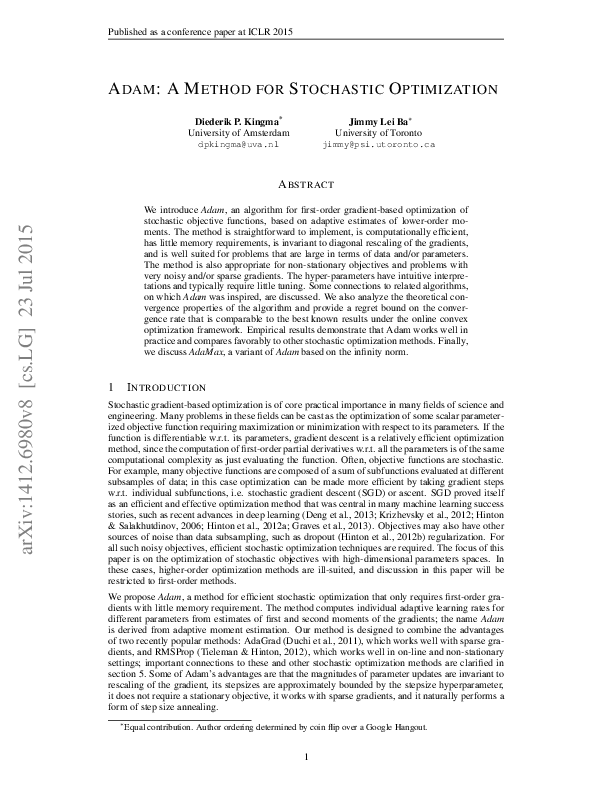

In [8]:
from wand.image import Image as WImage
img = WImage(filename='1412.6980v8.pdf')
img

## Classification

In [9]:
df = pd.read_csv('data/train.csv')
df2 = df.drop(['Name', 'PassengerId', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df2 = pd.get_dummies(df2)
df2.dropna(inplace=True)
predictors = df2.drop(['Survived'], axis=1).to_numpy()
target = to_categorical(df2['Survived'])
n_cols = predictors.shape[1]

In [10]:
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(target.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

23/23 [==============================] - 0s 1ms/step - loss: 1.1084 - accuracy: 0.6092


## Saving, reloading and using your Model

In [11]:
from keras.models import load_model 
model.save('data/model_file.h5')
my_model = load_model('data/model_file.h5')

In [12]:
df_test = pd.read_csv('data/test.csv')
df2_test = df_test.drop(['Name', 'PassengerId', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df2_test = pd.get_dummies(df2_test)
df2_test.dropna(inplace=True)
pred_data = df2_test.to_numpy()

# Calculate predictions: predictions
predictions = my_model.predict(df2_test)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
predicted_prob_true[0:10]

array([1.0553518e-03, 1.8048378e-05, 1.2446015e-06, 1.4544850e-02,
       1.1792784e-01, 2.6125544e-01, 3.3808448e-03, 3.3425441e-01,
       1.1744325e-01, 3.4510595e-01], dtype=float32)

In [13]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________
